# CM3: Convolution with Max Operator and Mathematical Morphology

---
## Activate Conda Environment

To create the development environment, create and start the Anaconda environment, that contains all software needed to run this notebook properly.

Below is the terminal scripts to create and run the Anaconda environment.

```
conda env create -f ../i2dl.yml
source activate i2dl
```

---
## Download KITTI Road Dataset

Download must be done using browser, because it's necessary to inform your current mail to download the file.

Link: http://www.cvlibs.net/download.php?file=data_road.zip

### Unzip the files

Put the *data_road* zip file inside the folder *datasets/Kitti/* and unzip the file using the command below.

```
unzip data_road.zip
```

### *Datasets* Folder

The dataset folder should have a structure like this:
- datasets/
  - Kitti/
    - data_road/
    - testing/
    - training/


---
## Speed up training

To provide more speed in the training and testing operations, we put all images in Numpy array and read the images once. This operation avoid multiple disk/ssd readings.

To create it it's possible to use the command shell in AMRP folder or to use the notebook.
Below the instructions to run with the command shell.

```
python kitti.py --func=npy --set=train --augm=true
```

### Params
* set = {train || test}
  * Parâmetro para conjunto de treino ou teste a ser utilizado.

* augm? = {false || true}
  * Parâmetro para uso de dataset com data augmentation.

In [1]:
import npy_kitti as nk
nk.npy(set_name='train', augm=False)

../datasets/Kitti/data_road/training/image_2/
../datasets/Kitti/data_road/training/gt_image_2/
Done/ 289


---
## Train the Network
To run the neural network, use the command shell with the scripts below.

```
python kitti.py --func=train --net=full --check=true --augm=true --load=true
python kitti.py --func=train --net=hed --merge=add --check=true --augm=true --load=true
python kitti.py --func=train --net=hed --merge=avg --check=true --augm=true --load=true
python kitti.py --func=train --net=hed --merge=max --check=true --augm=true --load=true
python kitti.py --func=train --net=hed --merge=maj --check=true --augm=true --load=true --vote=3
```

### Params
* func = { run }
  * Opção para execução da rede neural.

* net = { hed || full }
  * Parâmetro correspondente ao nome da rede neural a ser utilizada (hed ou full).

* merge = { avg || max || add || maj }
  * Parâmetro correspondente ao nome da operação a ser executada.

* check = {false || true}
  * Parâmetro para armazenamento de pontos de controle.

* vote? = {1-5} (*OPCIONAL: somente para merge==maj*)
  * Parâmetro correspondente ao número de votos necessários para que sejam consideradas as maiorias.

* augm? = {false || true}  (*OPCIONAL*)
  * Parâmetro para uso de dataset com data augmentation.

* load? = {false || true} (*OPCIONAL*)
  * Parâmetro para uso de pesos da rede vggnet16.


In [ ]:
import train_kitti as trk
trk.train('hed',merge='max', check=True, augm=False, load=True)

In [ ]:
import train_kitti as trk
trk.train('full', merge=None, check=True, augm=False, load=True)

---
## Test the Results
To test the networks, marking the road in the images or produce the ground-truths to submit into Kitti dataset, use the scritps below.

```
python kitti.py --func=test --net=hed --merge=max --set=train --mark=false
python kitti.py --func=test --net=full --set=train --mark=false
```

### Params
* net = { hed || full }
  * Parâmetro correspondente ao nome da rede neural a ser utilizada.

* merge = { avg || max || add || maj }
  * Parâmetro correspondente ao nome da operação a ser executada.

* set = {train || test}
  * Parâmetro para conjunto de treino ou teste a ser utilizado.

* mark = {false || true}
  * Parâmetro para marcar rodovia sobre a imagem original ou gerar grond-truth.


In [5]:
#marcar rodovia sobre a imagem original

import test_kitti as tek
tek.test(net='hed', merge_name='max', set_name='test', mark=True)

../model-json/hed_kitti_model_max.json
../weights/hed_augm/max_400_augm.hdf5
../export/Kitti/hed/test/
../datasets/Kitti/data_road/testing/image_2/*.*
Done/ 290


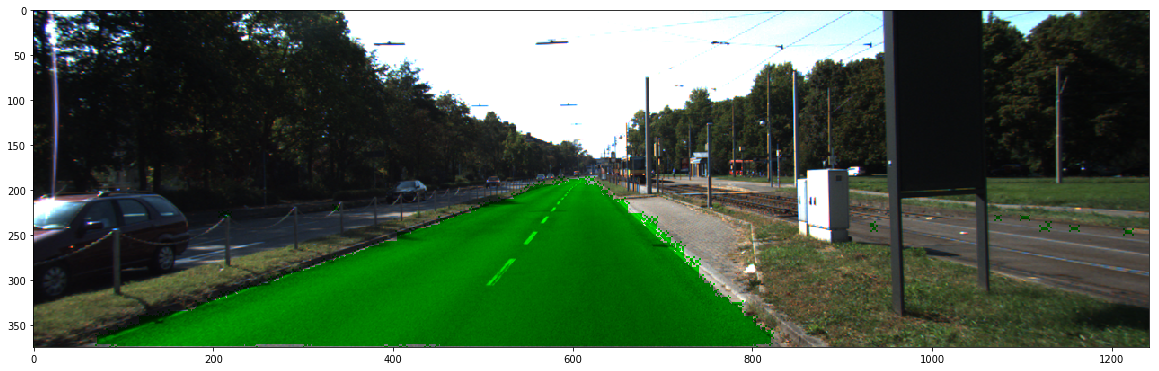

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_name = '../export/Kitti/hed/test/um_000000.png'

img = mpimg.imread(img_name)
plt.figure(figsize=(20,20))
plt.imshow(img)

In [8]:
#mostrar a imagem resultante ("ground-truth" gerado)

import test_kitti as tek
tek.test(net='full', merge_name=None, set_name='test', mark=False)

../model-json/full_kitti_model_max.json
../weights/full_augm/full_400_augm.hdf5
../export/Kitti/full/test/
../datasets/Kitti/data_road/testing/image_2/*.*


/home/falreis/anaconda3/envs/hed/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/falreis/anaconda3/envs/hed/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/falreis/anaconda3/envs/hed/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Done/ 290


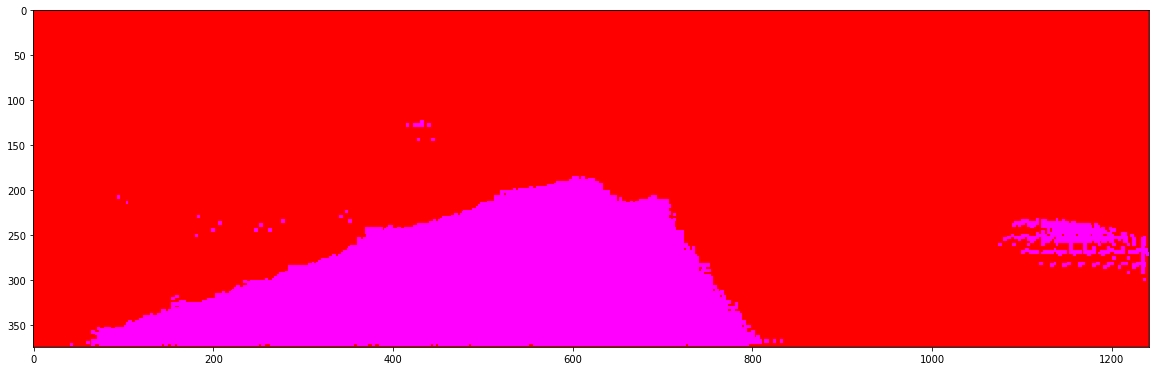

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_name = '../export/Kitti/full/test/um_000000.png'

img = mpimg.imread(img_name)
plt.figure(figsize=(20,20))
plt.imshow(img)

---
## Evaluate Results

To eval the results, use the Kitti benchmark toolkit. The repository contains an version of Kitti benchmark toolkit with all pre-requisites into an Anaconda environment.


### KITTI Eval Environment

To create the eval environment, run the commands below in the terminal.

```
conda env create -f ../../eval/kitti.yml
source activate kitti
```

### Change File Names

To eval the results, change the name of the files create by the test procedure. Following this tutorial, it is necessary to install *rename* program, as the code below.

```
sudo apt install rename
cd ../export/Kitti/hed/train
rename 's/umm_/umm_road_/' * 
rename 's/um_/um_lane_/' *
rename 's/uu_/uu_road_/' *
```

### Eval Procedure

The commands should have the same structure as the code below.

```
cd ../../eval/Kitti/
python evaluateRoad.py ../../code/export/Kitti/hed/train ../../code/datasets/Kitti/data_road/training
```


### Other Information

Follow the README inside the eval folder.

##  Eval Results

Results are described below. The warning messages were removed.

```
Starting evaluation ...
Available categories are: ['um_road', 'umm_road', 'uu_road']
Execute evaluation for category um_road ...
Searching for submitted files with prefix: um_road_
MaxF: 95.08 
AvgPrec: 85.48 
PRE_wp: 92.38 
REC_wp: 97.95 
FPR_wp: 1.59 
FNR_wp: 2.05 
('Finished evaluating category: um_road ',)
Execute evaluation for category umm_road ...
Searching for submitted files with prefix: umm_road_
Computing evaluation scores...
MaxF: 96.18 
AvgPrec: 88.45 
PRE_wp: 94.90 
REC_wp: 97.49 
FPR_wp: 1.64 
FNR_wp: 2.51 
('Finished evaluating category: umm_road ',)
Execute evaluation for category uu_road ...
Searching for submitted files with prefix: uu_road_
Computing evaluation scores...
MaxF: 93.12 
AvgPrec: 83.67 
PRE_wp: 90.68 
REC_wp: 95.71 
FPR_wp: 1.55 
FNR_wp: 4.29 
('Finished evaluating category: uu_road ',)
Successfully finished evaluation for 3 categories: ['um_road', 'umm_road', 'uu_road'] 
```